In [1]:
%load_ext cudf.pandas

<img src="https://docs.xarray.dev/en/stable/_static/dataset-diagram-logo.png" align="right" width="30%">

# Geography with Cartopy

Since xarray's default plotting functionality builds on matplotlib, we can
seamlessly use cartopy to make nice maps:

1. Specify a `projection` for the plot when creating a new figure `fig` with
   axis `axis`.
2. Explicitly ask xarray to plot to axis `axis` by passing the kwarg `ax=axis`.
3. Specify the projection of the data using `transform` (`PlateCarree` here) in
   `.plot()`.


In [2]:
%%cudf.pandas.profile

import cartopy.crs as ccrs
import matplotlib as mpl
import matplotlib.pyplot as plt
import xarray as xr

%config InlineBackend.figure_format='retina'

                                                                                              
                                  Total time elapsed: 2.103 seconds                           
                                0 GPU function calls in 0.000 seconds                         
                                0 CPU function calls in 0.000 seconds                         
                                                                                              
                                                Stats                                         
                                                                                              
┏━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━━┓
┃ Function ┃ GPU ncalls ┃ GPU cumtime ┃ GPU percall ┃ CPU ncalls ┃ CPU cumtime ┃ CPU percall ┃
┡━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━━┩
└──────────┴────────────┴─────────────┴─────────────┴────────────┴─────────────┴─────────────┘

In [3]:
%%cudf.pandas.profile

ds = xr.tutorial.open_dataset("air_temperature_gradient")
monthly_means = ds.groupby("time.month").mean()
# xarray's groupby reductions drop attributes. Let's assign them back so we get nice labels.
monthly_means.Tair.attrs = ds.Tair.attrs

                                                                                                                
                                           Total time elapsed: 5.291 seconds                                    
                                        923 GPU function calls in 0.554 seconds                                 
                                         20 CPU function calls in 0.014 seconds                                 
                                                                                                                
                                                         Stats                                                  
                                                                                                                
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━━┓
┃ Function                   ┃ GPU ncalls ┃ GPU cumtime ┃ GPU percall ┃ CPU ncalls ┃ CPU cumtime ┃ CPU percall ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━━┩
│ isna                       │ 0          │ 0.000       │ 0.000       │ 12         │ 0.007       │ 0.001       │
│ to_timedelta               │ 0          │ 0.000       │ 0.000       │ 6          │ 0.005       │ 0.001       │
│ ndarray.reshape            │ 1          │ 0.000       │ 0.000       │ 2          │ 0.002       │ 0.001       │
│ Index                      │ 4          │ 0.010       │ 0.003       │ 0          │ 0.000       │ 0.000       │
│ Float32Index.__len__       │ 574        │ 0.182       │ 0.000       │ 0          │ 0.000       │ 0.000       │
│ Float32Index.copy          │ 56         │ 0.023       │ 0.000       │ 0          │ 0.000       │ 0.000       │
│ Float32Index.__setattr__   │ 6          │ 0.003       │ 0.000       │ 0          │ 0.000       │ 0.000       │
│ DatetimeIndex.__len__      │ 116        │ 0.040       │ 0.000       │ 0          │ 0.000       │ 0.000       │
│ DatetimeIndex.copy         │ 18         │ 0.008       │ 0.000       │ 0          │ 0.000       │ 0.000       │
│ DatetimeIndex.__setattr__  │ 3          │ 0.001       │ 0.000       │ 0          │ 0.000       │ 0.000       │
│ DatetimeIndex.__deepcopy__ │ 1          │ 0.001       │ 0.001       │ 0          │ 0.000       │ 0.000       │
│ Series                     │ 1          │ 0.002       │ 0.002       │ 0          │ 0.000       │ 0.000       │
│ ndarray.astype             │ 1          │ 0.106       │ 0.106       │ 0          │ 0.000       │ 0.000       │
│ Int64Index.__len__         │ 14         │ 0.005       │ 0.000       │ 0          │ 0.000       │ 0.000       │
│ Int64Index.set_names       │ 1          │ 0.001       │ 0.001       │ 0          │ 0.000       │ 0.000       │
│ factorize                  │ 1          │ 0.006       │ 0.006       │ 0          │ 0.000       │ 0.000       │
│ DatetimeIndex.__getitem__  │ 13         │ 0.105       │ 0.008       │ 0          │ 0.000       │ 0.000       │
│ Float32Index.equals        │ 66         │ 0.031       │ 0.000       │ 0          │ 0.000       │ 0.000       │
│ Float32Index.set_names     │ 44         │ 0.027       │ 0.001       │ 0          │ 0.000       │ 0.000       │
│ Int64Index.copy            │ 1          │ 0.000       │ 0.000       │ 0          │ 0.000       │ 0.000       │
│ Int64Index.__setattr__     │ 2          │ 0.001       │ 0.000       │ 0          │ 0.000       │ 0.000       │
└────────────────────────────┴────────────┴─────────────┴─────────────┴────────────┴─────────────┴─────────────┘

Not all pandas operations ran on the GPU. The following functions required CPU fallback:

- isna
- to_timedelta
- ndarray.reshape

To request GPU support for any of these functions, please file a Github issue here: 
]8;id=521183;https://github.com/rapidsai/cudf/issues/new?assignees=&labels=%3F+-+Needs+Triage%2C+feature+request&projects=&template=pandas_function_request.md&title=%5BFEA%5D\https://github.com/rapidsai/cudf/issues/new/choose]8;;\.

## Basic plot

/datasets/charlesb/miniforge3/envs/cudf-xarray-tutorial/lib/python3.10/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_physical/ne_110m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


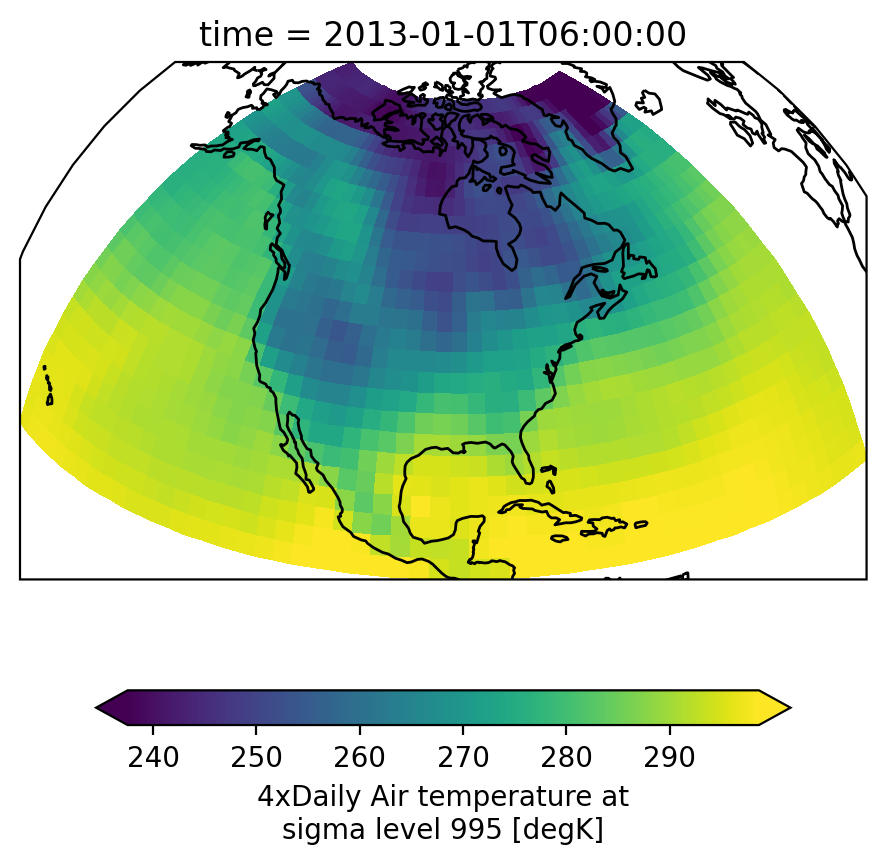

                                                                                                               
                                           Total time elapsed: 2.802 seconds                                   
                                        32 GPU function calls in 0.016 seconds                                 
                                         1 CPU function calls in 0.001 seconds                                 
                                                                                                               
                                                         Stats                                                 
                                                                                                               
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━━┓
┃ Function                  ┃ GPU ncalls ┃ GPU cumtime ┃ GPU percall ┃ CPU ncalls ┃ CPU cumtime ┃ CPU percall ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━━┩
│ DatetimeIndex.__len__     │ 1          │ 0.000       │ 0.000       │ 0          │ 0.000       │ 0.000       │
│ DatetimeIndex.__getitem__ │ 1          │ 0.001       │ 0.001       │ 0          │ 0.000       │ 0.000       │
│ Series                    │ 2          │ 0.005       │ 0.003       │ 0          │ 0.000       │ 0.000       │
│ Float32Index.__len__      │ 26         │ 0.008       │ 0.000       │ 0          │ 0.000       │ 0.000       │
│ Float32Index.copy         │ 2          │ 0.001       │ 0.000       │ 0          │ 0.000       │ 0.000       │
│ isna                      │ 0          │ 0.000       │ 0.000       │ 1          │ 0.001       │ 0.001       │
└───────────────────────────┴────────────┴─────────────┴─────────────┴────────────┴─────────────┴─────────────┘

Not all pandas operations ran on the GPU. The following functions required CPU fallback:

- isna

To request GPU support for any of these functions, please file a Github issue here: 
]8;id=375488;https://github.com/rapidsai/cudf/issues/new?assignees=&labels=%3F+-+Needs+Triage%2C+feature+request&projects=&template=pandas_function_request.md&title=%5BFEA%5D\https://github.com/rapidsai/cudf/issues/new/choose]8;;\.

In [4]:
%%cudf.pandas.profile

fig, axis = plt.subplots(1, 1, subplot_kw=dict(projection=ccrs.Orthographic(-90, 30)))

ds.Tair.isel(time=1).plot(
    ax=axis,
    transform=ccrs.PlateCarree(),  # this is important!
    # usual xarray stuff
    cbar_kwargs={"orientation": "horizontal", "shrink": 0.7},
    robust=True,
)
axis.coastlines()  # cartopy function

## Faceting maps

We can make faceted maps. Since `FacetGrid` creates the axes it plots to, we
need to pass the `projection` kwarg in `subplot_kws`. This makes sure that the
subplots are set up properly for cartopy.


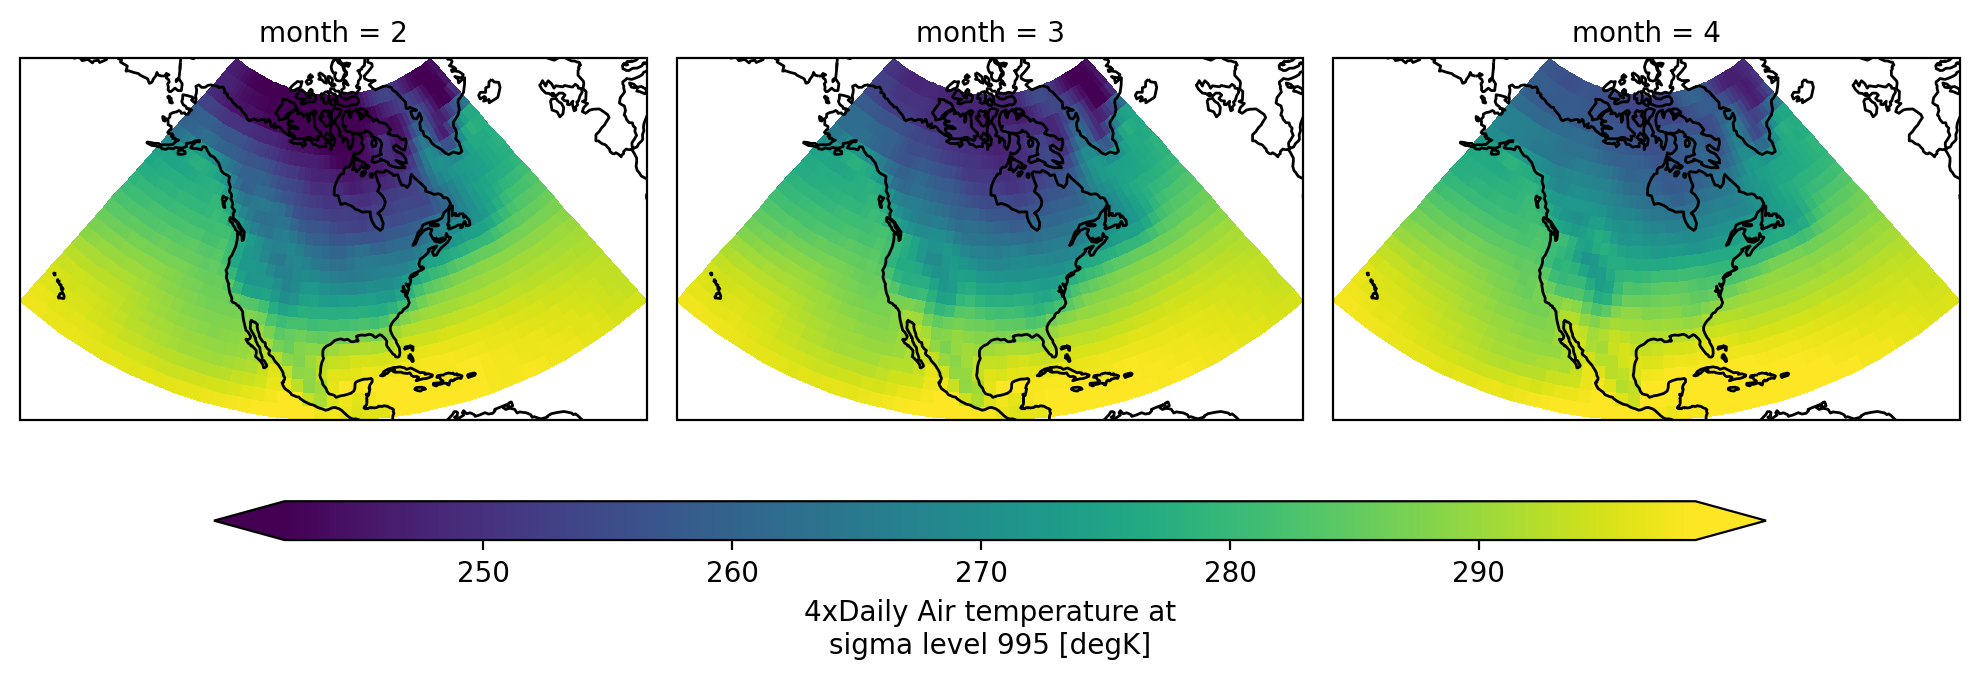

                                                                                                            
                                         Total time elapsed: 3.141 seconds                                  
                                      157 GPU function calls in 0.080 seconds                               
                                       3 CPU function calls in 0.002 seconds                                
                                                                                                            
                                                       Stats                                                
                                                                                                            
┏━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━━┓
┃ Function               ┃ GPU ncalls ┃ GPU cumtime ┃ GPU percall ┃ CPU ncalls ┃ CPU cumtime ┃ CPU percall ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━━┩
│ Int64Index.__getitem__ │ 8          │ 0.009       │ 0.001       │ 0          │ 0.000       │ 0.000       │
│ Int64Index.__len__     │ 29         │ 0.010       │ 0.000       │ 0          │ 0.000       │ 0.000       │
│ Int64Index.copy        │ 2          │ 0.001       │ 0.000       │ 0          │ 0.000       │ 0.000       │
│ Float32Index.__len__   │ 108        │ 0.035       │ 0.000       │ 0          │ 0.000       │ 0.000       │
│ Float32Index.copy      │ 2          │ 0.001       │ 0.000       │ 0          │ 0.000       │ 0.000       │
│ Int64Index.set_names   │ 1          │ 0.001       │ 0.001       │ 0          │ 0.000       │ 0.000       │
│ Int64Index.get_loc     │ 7          │ 0.025       │ 0.004       │ 0          │ 0.000       │ 0.000       │
│ isna                   │ 0          │ 0.000       │ 0.000       │ 3          │ 0.002       │ 0.001       │
└────────────────────────┴────────────┴─────────────┴─────────────┴────────────┴─────────────┴─────────────┘

Not all pandas operations ran on the GPU. The following functions required CPU fallback:

- isna

To request GPU support for any of these functions, please file a Github issue here: 
]8;id=11062;https://github.com/rapidsai/cudf/issues/new?assignees=&labels=%3F+-+Needs+Triage%2C+feature+request&projects=&template=pandas_function_request.md&title=%5BFEA%5D\https://github.com/rapidsai/cudf/issues/new/choose]8;;\.

In [5]:
%%cudf.pandas.profile

fg = monthly_means.Tair.isel(month=[1, 2, 3]).plot(
    col="month",
    transform=ccrs.PlateCarree(),  # remember to provide this!
    subplot_kws={"projection": ccrs.LambertConformal(central_longitude=-95, central_latitude=45)},
    cbar_kwargs={"orientation": "horizontal", "shrink": 0.8, "aspect": 40},
    robust=True,
)

# lets add a coastline to each axis
# great reason to use FacetGrid.map
fg.map(lambda: plt.gca().coastlines())